<a href="https://colab.research.google.com/github/Faiz-Nadeem/Canine-and-Feline-Image-Classification/blob/main/Canine_and_Feline_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:12<00:00, 195MB/s]
100% 1.06G/1.06G [00:12<00:00, 91.3MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()


In [13]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [6]:
# data processing

train_dataset = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

#batch size determines how many images are processed in each iteration during training or validation

validation_dataset = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',  # assign int to images ---cat --0 and dog-----1
    batch_size=32,     #generators---batch ---divisions   "" batch size determines how many samples are processed in each iteration
    image_size=(256,256)  #assigning same size to every image or dimension of image
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [7]:
#normalization(scaling)
def process(image,label):
  image =tf.cast(image/255. ,tf.float32)
  return image,label

train_dataset = train_dataset.map(process)
validation_dataset = validation_dataset.map(process)

#each photograph has a label indicating the category it belongs to (e.g., 'cat' or 'dog'). The photographs are in color, and each pixel in a photograph has a value between 0 and 255.
#Now, normalizing the pixel values is like converting the color intensity of each pixel to a scale that ranges from 0 to 1.

In [14]:
# now creating cnn model
# three layers
model = Sequential()  # layer formation

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
#32---filters, kernel_size means filter size
#kernel-size 3,3  ----- filter grid
#The input shape is (256, 256, 3), representing a 256x256 image with three color channels (RGB).

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
#64---filters
model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [15]:
#model compile

model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [16]:
#model execute

history= model.fit(train_dataset,epochs=10,validation_data=validation_dataset)
# /625 ---batches and 32 ---batch size   625*32=20000 images--(total)

Epoch 1/10
625/625 [==============================] - 68s 102ms/step - loss: 1.4098 - accuracy: 0.5992 - val_loss: 0.6319 - val_accuracy: 0.6762
Epoch 2/10
625/625 [==============================] - 63s 100ms/step - loss: 0.5776 - accuracy: 0.6967 - val_loss: 0.5995 - val_accuracy: 0.6744
Epoch 3/10
625/625 [==============================] - 63s 100ms/step - loss: 0.4993 - accuracy: 0.7591 - val_loss: 0.5304 - val_accuracy: 0.7354
Epoch 4/10
625/625 [==============================] - 82s 131ms/step - loss: 0.4383 - accuracy: 0.8015 - val_loss: 0.4857 - val_accuracy: 0.7760
Epoch 5/10
625/625 [==============================] - 65s 104ms/step - loss: 0.3694 - accuracy: 0.8372 - val_loss: 0.5014 - val_accuracy: 0.7612
Epoch 6/10
625/625 [==============================] - 67s 107ms/step - loss: 0.2960 - accuracy: 0.8740 - val_loss: 0.4671 - val_accuracy: 0.8034
Epoch 7/10
625/625 [==============================] - 64s 102ms/step - loss: 0.2098 - accuracy: 0.9125 - val_loss: 0.6579 - val_ac

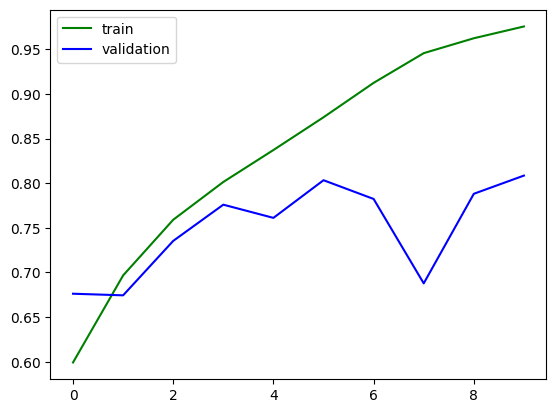

In [18]:
import matplotlib.pyplot as mplot
mplot.plot(history.history['accuracy'],color='green',label='train')
mplot.plot(history.history['val_accuracy'],color='blue',label='validation')
mplot.legend()
mplot.show()

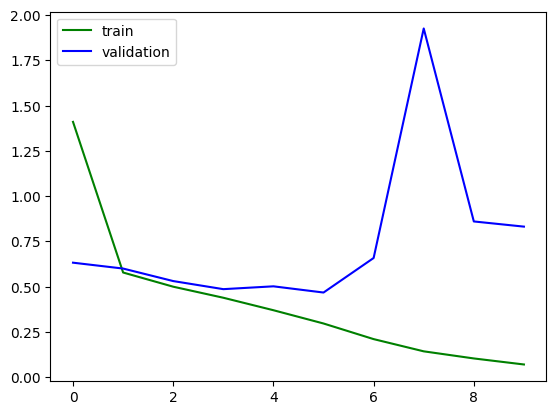

In [19]:
mplot.plot(history.history['loss'],color='green',label='train')
mplot.plot(history.history['val_loss'],color='blue',label='validation')
mplot.legend()
mplot.show()

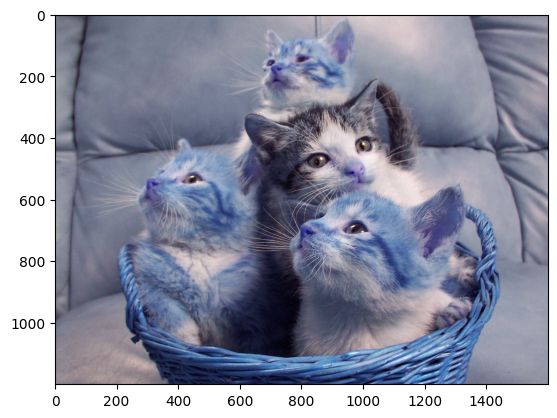

In [20]:
import cv2
test_img = cv2.imread('/content/cat.jpg')
mplot.imshow(test_img)

In [23]:
test_img.shape

(1200, 1600, 3)

In [24]:
test_img= cv2.resize(test_img,(256,256))

In [25]:
test_input= test_img.reshape((1,256,256,3))
#256,256,3  3----dimension,256,256---size --image
#and 1 indicated 1 image and (256,256,3) this is the size and dimension of it

In [26]:
model.predict(test_input)
# 0--indicates--cat images

1/1 [==============================] - 0s 359ms/step


array([[0.]], dtype=float32)

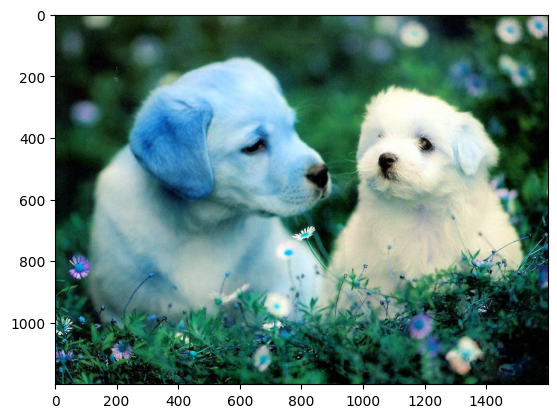

In [32]:
test_img= cv2.imread('/content/dog.jpg')
mplot.imshow(test_img)

In [33]:
test_img.shape

(1200, 1600, 3)

In [34]:
test_img= cv2.resize(test_img,(256,256))
test_input2= test_img.reshape((1,256,256,3))

In [35]:
model.predict(test_input2)
#1 indicate--dog image

1/1 [==============================] - 0s 28ms/step


array([[1.]], dtype=float32)